In [0]:
import tensorflow as tf
print( tf.__version__ )

# Hd17

1.13.1


In [0]:
!pip install tensorflow-gpu # For Google Collab

    25% |████████                        | 86.5MB 23.3MB/s eta 0:00:12
Operation cancelled by user


In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f5401fb0e48>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f5401fb0ba8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f5401fb09b0>)

In [0]:
print(" Number of data points : ", mnist.train.images.shape[0],"  Number of pixels in each image : ",mnist.train.images.shape[1])

 Number of data points :  55000   Number of pixels in each image :  784


In [0]:
print(" Number of data points : ", mnist.test.labels.shape[0]," Length of the one hot encoded label vector :",mnist.test.labels.shape[1])

 Number of data points :  10000  Length of the one hot encoded label vector : 10


Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels. <br><br>


mnist.train.images is a tensor (an n-dimensional array) with a shape of [55000, 784]. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.

We're going to want our class-labels as "one-hot vectors".
<br> A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the t-th digit will be represented as a vector which is 1 in the t-th dimension. 
<br><br>For example, 3 would be [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 0 ]     ( 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ) Consequently, mnist.train.labels is a [55000, 10] array of floats.

One hot encoding of class label 

If you want to assign probabilities to an object being one of several different things, softmax (Multiclass Logistic regression) is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. Even later on, when we train more sophisticated models, the final step will be a layer of softmax.

A softmax regression has two steps: first we add up the evidence of our input being in certain classes, and then we convert that evidence into probabilities.


In [0]:
import tensorflow as tf


from tensorflow.python.client import device_lib

print( device_lib.list_local_devices() )   # Get a list of devices like GPUs and CPUs available to TF

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5035554339489558565
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12992341055350125480
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11561445467505685014
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14800692839
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15814315311471821293
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In tensorflow we have types like constants, variables, placeholders ... etc

Suppose we're training  a softmax :
 Our weights and biases ( b ) {  w.T * x + b } are variables that are  needed to  be updated everytime
 variable : Something we can update and change
 
 constant : Something we can't update and change<br><br>
 
 <b>Placeholders </b>: is like a memory location for which we define a size sometimes ( sometimes we don't ) Placeholder can be imagained as  a memory unit that we use to load various mini-batches of input data while training.
 
 A placeholder is simply a variable that we will assign data to at a later date.
  
  Suppose we are training a mini batch of 100 xi , we will use 100 xi's for 1 iteration after the iteration those 100 xi's (value) will be changed. A placeholder is typically defined to store these Transient things like mini batches.
  
  We can think of it as memory that is allocated for our task
  
  <i>Ref : https://databricks.com/tensorflow/placeholders
 

In [0]:
x = tf.placeholder( tf.float32, [None, 784] )

# We want to be able to input any number of MNIST images,  each flattened into a 784-dimensional vector. 
# We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. 

# Type 32 bit float values has 2 dimensions one is 784 and the other is None ( idk what it will be ) i,e; no. of cols = 784, no. of datapoints = unknown

# dtype (tf.float32) : The type of elements in the tensor to be fed.
# shape ([None, 784]): The shape of the tensor to be fed (optional). If the shape is not specified, you can feed a tensor of any shape.

# Inserts a placeholder for a tensor that will be always fed.
# Important: This tensor will produce an error if evaluated. Its value must be fed using the feed_dict optional argument to Session.run(), Tensor.eval(), or Operation.run().

# Ref : https://www.tensorflow.org/api_docs/python/tf/placeholder

We also need the weights and biases for our model.  We could imagine treating these like additional inputs, 
but TensorFlow has an even better way to handle it: Variable. 

A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. 

A TensorFlow variable is the best way to represent shared, persistent state manipulated by your program.

Variables are manipulated via the tf.Variable class.

<i> Ref : https://www.tensorflow.org/guide/variables

In [0]:
w = tf.Variable( tf.zeros([784, 10]) )  # Weight, initializing to 0's

b = tf.Variable( tf.zeros([10]) )       # Bias

# Our input is 784 ( as we have 784 dims ) 784 dims for each weight. This is layer 1
# Our Softmax layer (layer 2) has 10 outputs (since we have 10 labels) so we have 784 * 10 connections bw layer 1 and layer 2
# Our Softmax has 10 inputs and we have a bias term for input 0

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
print( w.shape )
type(w)

(784, 10)


tensorflow.python.ops.variables.RefVariable

Softmax, TensorFlow : A convolutional neural network uses many layers to understand parts of data. But to classify the data, we must have a set of probabilities—we make a final decision.

Using softmax, we get a set of probabilities that add up to 1. Softmax is a well-known function that normalizes our values to a standard range (0 to 1).


Notes, softmax. This method is used in the final stage of a convolutional neural network. Softmax "squashes" values, removing outliers.

Tip :  Mathematicians have the best terminology. We can "squash" our numbers with softmax.

Quote : Softmax is a generalization of the logistic function that "squashes" a K-dimensional vector of arbitrary real values to a K-dimensional vector of real values in the range [0, 1] that add up to 1.

In [0]:
y = tf.nn.softmax( tf.matmul(x, w) + b )   # Predicted y

# tf.matmul(x, w) + b : This is w.T * x + b
# We apply softmax on top of w.T * x + b

# Ref : https://www.tensorflow.org/api_docs/python/tf/linalg/matmul
# Ref : https://www.tensorflow.org/api_docs/python/tf/nn/softmax

In [0]:
print( y.shape )
type(y)

(?, 10)


tensorflow.python.framework.ops.Tensor

In [0]:
Y = tf.placeholder( tf.float32, [None, 10] )  # Y is true label of the images, and similar to x

 <b>Defining the loss function</b> : multi class log-loss/cross-entropy

 First, tf.log computes the logarithm of each element of y. 

 Next, we multiply each element of Y with the corresponding element   of tf.log(y).  <br><br>

Then tf.reduce_sum adds the elements in the second dimension of y,  due to the reduction_indices=[1] parameter or simply 1. 

 Reduction is an operation that removes one or more dimensions from a tensor by performing 
 certain operations across those dimensions.

We can specify the "axis" we wish to sum—this changes the values summed and the output.
 
<i> Ref : https://www.dotnetperls.com/reduce-sum-tensorflow </i> <br><br>

 Finally, tf.reduce_mean computes the mean over all the examples in the batch.
 
 reduce_mean sums and averages all the values in the tensor (all 6 of them).

If we specify an axis of 0. The first elements are averaged, and the second elements are averaged.

<i>  Ref : https://www.dotnetperls.com/reduce-mean-tensorflow


In [0]:
# Defining Cross Entropy

centropy = tf.reduce_mean( -tf.reduce_sum( Y * tf.log(y), 1 ))

# For all i : Take yi log ( Yi ) then Sum it up and take the average
# tf.reduce_sum() : Second argument indicates what axis to sum. ( 1 means row sum )

# Why -tf.reduce_sum ? : Because we are computing multiclass log-loss, which has minus sign in it.

In [0]:
centropy.shape

TensorShape([])

In [0]:
# In this case, we ask TensorFlow to minimize cross_entropy 
# using the gradient descent algorithm with a learning rate of 0.05.


trStep = tf.train.GradientDescentOptimizer(0.05).minimize( centropy )  # Train Step

# means Training needs to be done with GradientDescent ptimizer which minimizes cross entropy
# Here 0.05 is the learning rate

# What TensorFlow actually does here, behind the scenes, 
# is to add new operations to your computation-graph  which implement backpropagation and gradient descent.
# Then it gives you back a single operation which, when run, does a step of gradient descent training, 
# slightly tweaking your variables to reduce the loss.

# Ref : # https://www.tensorflow.org/versions/r1.2/api_guides/python/train#Optimizers

Instructions for updating:
Use tf.cast instead.


Tensorflow converts everything to a computation graph

Session means we are starting the computation from here

Session means we are defining core thing that needs to be run 

In [0]:
session = tf.InteractiveSession()

# A class for running TensorFlow operations.
# A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated. 

# InteractiveSession : A TensorFlow Session for use in interactive contexts, such as a shell.
# This is convenient in interactive shells and IPython notebooks

# Ref : https://www.tensorflow.org/api_docs/python/tf/Session
# Ref : https://www.tensorflow.org/api_docs/python/tf/InteractiveSession

In [0]:
# We first have to create an operation to initialize the variables we created

tf.global_variables_initializer().run()

# Returns an Op that initializes global variables in the graph.

In [0]:
# Each step of the loop, we get a "mini-batch" of one hundred random data points from our training set. 
# We run train_step feeding in the batches data to replace the placeholders

for _ in range(1000):
  
    batchX, batchY = mnist.train.next_batch(100)   # returns a minibatch of 100 xi's and yi's 
    
    session.run( trStep, feed_dict = { x: batchX, Y: batchY} )  # we feed x as batchX and Y as batchY and we feed this batch to Training algo

# _ in range : when we don't care about the index we just wanna loop 
# feed_dict: A dictionary that maps Tensor objects to feed values. 

# Using small batches of random data is called stochastic training - in this case, stochastic gradient descent. 
# Ideally, we'd like to use all our data for every step of training because that would give us a better sense of
# what we should be doing, but that's expensive. So, instead, we use a different subset every time. 
# Doing this is cheap and has much of the same benefit.

In [0]:
correctPred = tf.equal( tf.argmax(y,1), tf.argmax(Y,1) )  

# tf.argmax(input, axis=None, name=None, dimension=None) : Returns the index with the largest value across axis of a tensor.

# Finding the max value in 10 dim  vec <0,1----9> and checking if both hav the same index
# For ex: y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
#     and Y1 = < 0.3, 0.1, 0.8, 0.2, 0.3, 0.1, 0.4, 0.1, 0.3, 0.4 >  i,e; label 2
# That means we have a correct prediction

accuracy = tf.reduce_mean( tf.cast( correctPred, tf.float32 ) )

# tf.cast : Casts a tensor to a new type.
# The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.

print( session.run( accuracy, feed_dict = { x: mnist.test.images, Y: mnist.test.labels} ) * 100, ' % accuracy ' )


# Ref : # https://stackoverflow.com/a/41863099


90.03000259399414  % accuracy 


In [0]:
print( mnist.train.num_examples ) # equals to no. of data points  

55000

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# We want our plot to be dynamically updated after each epoch so Dynamic Plotting

def plot( x, y, y1, ax ):   # Dynamic Plotting
    
    ax.plot(x, y, 'b', label = " Train Loss ")
    ax.plot(x, y1, 'r', label = " Test Loss ")
  
    if len(x) == 1:
        plt.legend()
    
    fig.canvas.draw()
    
# Ref : https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# Ref : https://stackoverflow.com/a/14434334

 Accuracy :  91.04999899864197  % 


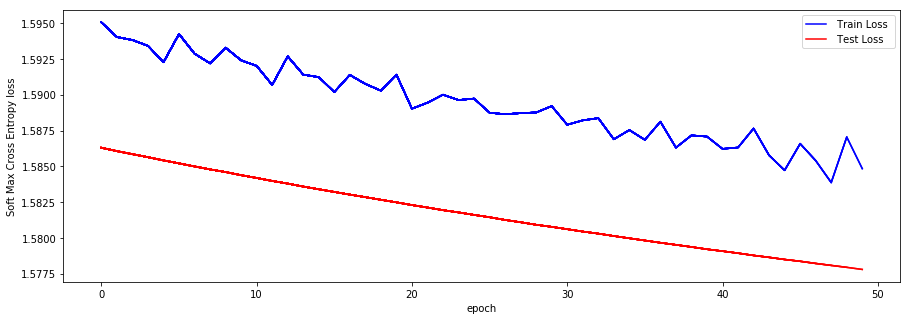

In [0]:
epochs = 50 
# epoch means when all training points have been passed through once to mini-batch is called 1 epoch

batch = 1000

centropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = y, labels = Y ))

tStep = tf.train.GradientDescentOptimizer(0.05).minimize( centropy )
# means Training needs to be done with GradientDescent optimizer which minimizes cross entropy
# Here 0.05 is the learning rate

fig, ax = plt.subplots(1,1, figsize = ( 15, 5 )) # Subplot with 1 row and 1 col

ax.set_xlabel('epoch')
ax.set_ylabel('Soft Max Cross Entropy loss')

xs, ytrs, ytes = [], [], []

for epoch in range( epochs ):
  
        train_avg_cost = 0.
        test_avg_cost = 0.
      
        tbatch = int( mnist.train.num_examples / batch )
        # Loop over all batches
        
        for i in range(tbatch):
          
            batchX, batchY = mnist.train.next_batch( batch )
            
            _, c = session.run( [tStep, centropy], feed_dict={ x: batchX, Y: batchY })
            train_avg_cost += c / tbatch
            
            c = session.run( centropy, feed_dict={ x: mnist.test.images, Y: mnist.test.labels })
            test_avg_cost += c / tbatch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot(xs, ytrs, ytes, ax)
        

plot(xs, ytrs, ytes, ax)

cPrediction = tf.equal( tf.argmax(y,1), tf.argmax(Y,1) )

accuracy = tf.reduce_mean( tf.cast(cPrediction, tf.float32) )

print(" Accuracy : ", accuracy.eval( {x: mnist.test.images, Y: mnist.test.labels}) * 100, ' % ')

We can see from the above plot of 50 epochs we have a accuracy of 90.81 % which is great but our Training and Test loss are still very far

We need to make them come closer to do that we can increase epochs

 Accuracy :  91.51999950408936  % 


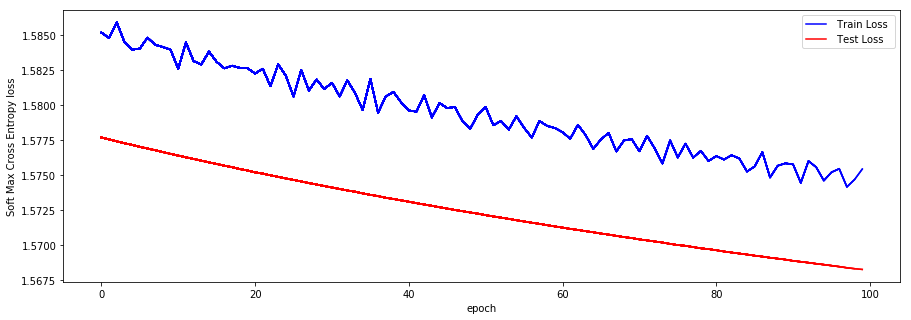

In [0]:
epochs = 100 
# epoch means when all training points have been passed through once to mini-batch is called 1 epoch

batch = 1000

centropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = y, labels = Y ))

tStep = tf.train.GradientDescentOptimizer(0.05).minimize( centropy )

fig, ax = plt.subplots(1,1, figsize = ( 15, 5 )) # Subplot with 1 row and 1 col

ax.set_xlabel('epoch')
ax.set_ylabel('Soft Max Cross Entropy loss')

xs, ytrs, ytes = [], [], []

for epoch in range( epochs ):
  
        train_avg_cost = 0.
        test_avg_cost = 0.
      
        tbatch = int( mnist.train.num_examples / batch )
        # Loop over all batches
        
        for i in range(tbatch):
          
            batchX, batchY = mnist.train.next_batch( batch )
            
            _, c = session.run( [tStep, centropy], feed_dict={ x: batchX, Y: batchY })
            train_avg_cost += c / tbatch
            
            c = session.run( centropy, feed_dict={ x: mnist.test.images, Y: mnist.test.labels })
            test_avg_cost += c / tbatch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot(xs, ytrs, ytes, ax)
        

plot(xs, ytrs, ytes, ax)

cPrediction = tf.equal( tf.argmax(y,1), tf.argmax(Y,1) )

accuracy = tf.reduce_mean( tf.cast(cPrediction, tf.float32) )

print(" Accuracy : ", accuracy.eval( {x: mnist.test.images, Y: mnist.test.labels}) * 100, ' % ')

 Accuracy :  91.93000197410583  % 


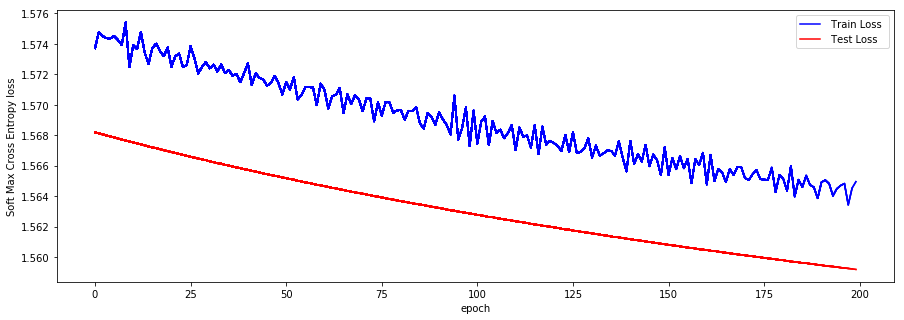

In [0]:
epochs = 200 
# epoch means when all training points have been passed through once to mini-batch is called 1 epoch

batch = 1000

centropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( logits = y, labels = Y ))

tStep = tf.train.GradientDescentOptimizer(0.05).minimize( centropy )

fig, ax = plt.subplots(1,1, figsize = ( 15, 5 )) # Subplot with 1 row and 1 col

ax.set_xlabel('epoch')
ax.set_ylabel('Soft Max Cross Entropy loss')

xs, ytrs, ytes = [], [], []

for epoch in range( epochs ):
  
        train_avg_cost = 0.
        test_avg_cost = 0.
      
        tbatch = int( mnist.train.num_examples / batch )
        # Loop over all batches
        
        for i in range(tbatch):
          
            batchX, batchY = mnist.train.next_batch( batch )
            
            _, c = session.run( [tStep, centropy], feed_dict={ x: batchX, Y: batchY })
            train_avg_cost += c / tbatch
            
            c = session.run( centropy, feed_dict={ x: mnist.test.images, Y: mnist.test.labels })
            test_avg_cost += c / tbatch

        xs.append(epoch)
        ytrs.append(train_avg_cost)
        ytes.append(test_avg_cost)
        plot(xs, ytrs, ytes, ax)
        

plot(xs, ytrs, ytes, ax)

cPrediction = tf.equal( tf.argmax(y,1), tf.argmax(Y,1) )

accuracy = tf.reduce_mean( tf.cast(cPrediction, tf.float32) )

print(" Accuracy : ", accuracy.eval( {x: mnist.test.images, Y: mnist.test.labels}) * 100, ' % ')

After trying 50 , 100, 200 epochs we see that Accuracy improves slightly but our Train loss and Test loss run parallel to each other in the given plot